# Data Analysis II
Aim of the notebook: Univariate analysis and Univariate outlier detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/processed/cleaned_data.csv')
meta = pd.read_csv('../data/meta_data.csv')

In [3]:
data.shape, meta.shape

((1459, 80), (81, 8))

((1459, 80), (81, 8))

((1459, 80), (81, 8))

In [4]:
meta

,col_name,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength
0,Id,0,0.000000,int64,Id,non,none,none
1,MSSubClass,0,0.000000,int64,MSSubClass,int,house,strong
2,MSZoning,0,0.000000,object,MSZoning,nom,location,medium
3,LotFrontage,259,17.739726,float64,LotFrontage,int,peripheral,medium
4,LotArea,0,0.000000,int64,LotArea,int,peripheral,medium
...,...,...,...,...,...,...,...,...
76,MoSold,0,0.000000,int64,MoSold,tem,house,medium
77,YrSold,0,0.000000,int64,YrSold,tem,house,strong
78,SaleType,0,0.000000,object,SaleType,nom,house,weak
79,SaleCondition,0,0.000000,object,SaleCondition,nom,house,weak


,col_name,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength
0,Id,0,0.000000,int64,Id,non,none,none
1,MSSubClass,0,0.000000,int64,MSSubClass,int,house,strong
2,MSZoning,0,0.000000,object,MSZoning,nom,location,medium
3,LotFrontage,259,17.739726,float64,LotFrontage,int,peripheral,medium
4,LotArea,0,0.000000,int64,LotArea,int,peripheral,medium
...,...,...,...,...,...,...,...,...
76,MoSold,0,0.000000,int64,MoSold,tem,house,medium
77,YrSold,0,0.000000,int64,YrSold,tem,house,strong
78,SaleType,0,0.000000,object,SaleType,nom,house,weak
79,SaleCondition,0,0.000000,object,SaleCondition,nom,house,weak


,col_name,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength
0,Id,0,0.000000,int64,Id,non,none,none
1,MSSubClass,0,0.000000,int64,MSSubClass,int,house,strong
2,MSZoning,0,0.000000,object,MSZoning,nom,location,medium
3,LotFrontage,259,17.739726,float64,LotFrontage,int,peripheral,medium
4,LotArea,0,0.000000,int64,LotArea,int,peripheral,medium
...,...,...,...,...,...,...,...,...
76,MoSold,0,0.000000,int64,MoSold,tem,house,medium
77,YrSold,0,0.000000,int64,YrSold,tem,house,strong
78,SaleType,0,0.000000,object,SaleType,nom,house,weak
79,SaleCondition,0,0.000000,object,SaleCondition,nom,house,weak


In [5]:
# dividing columns
cat_cols = meta.loc[(meta['expect_datatype']=='ord')|(meta['expect_datatype']=='nom'),'col_name']
num_cols = meta.loc[meta['expect_datatype']=='int','col_name']
temp = meta.loc[meta['expect_datatype']=='tem', 'col_name']
len(cat_cols) + len(num_cols)+len(temp)

79

79

79

In [6]:
# Checking value counts in categorical variables
for i in cat_cols:
    print(i)
    print("--------")
    print(data[i].value_counts())
    print('\n\n')

MSZoning
--------
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64



Street
--------
Pave    1453
Grvl       6
Name: Street, dtype: int64



Alley
--------
no_alley    1368
Grvl          50
Pave          41
Name: Alley, dtype: int64



LotShape
--------
Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64



LandContour
--------
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64



Utilities
--------
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64



LotConfig
--------
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64



LandSlope
--------
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64



Neighborhood
--------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
M

Name: GarageType, dtype: int64



Exterior1st
--------
VinylSd    514
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64



Exterior2nd
--------
VinylSd    503
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64



ExterQual
--------
TA    905
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64



ExterCond
--------
TA    1281
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64



Foundation
--------
PConc     646
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64



BsmtQual
--------
TA             649
Gd             

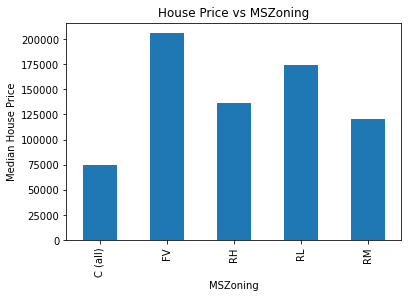

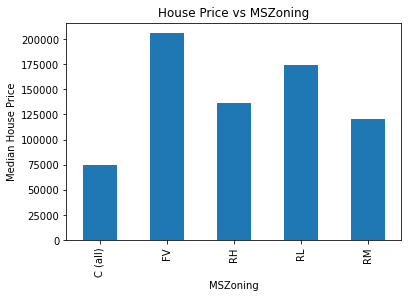

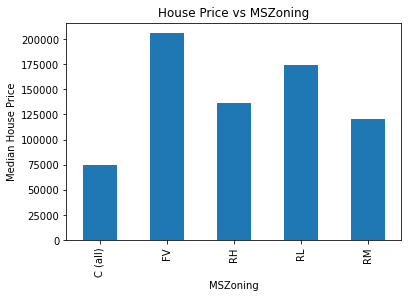

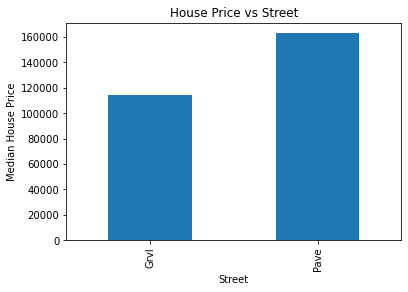

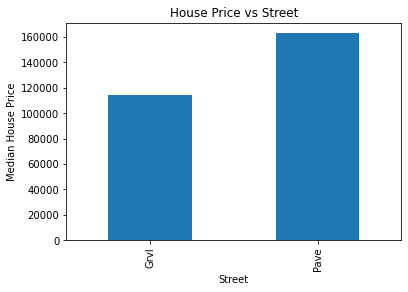

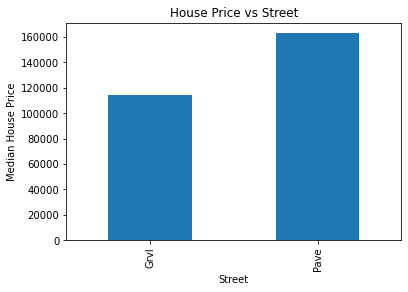

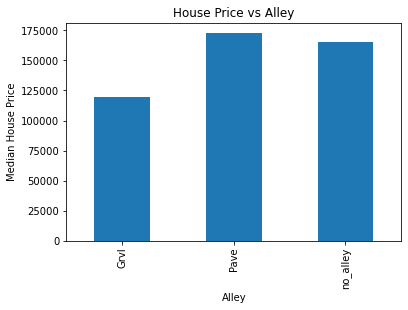

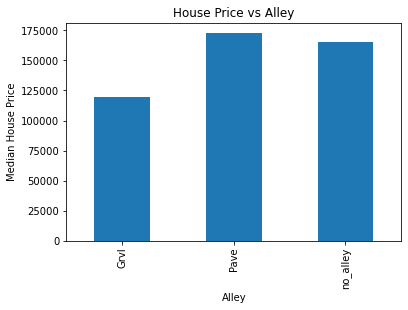

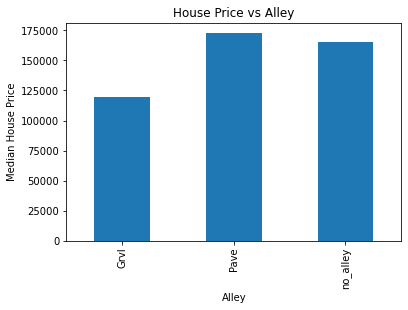

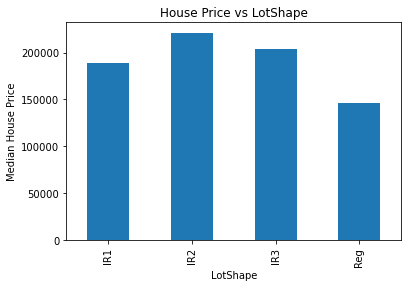

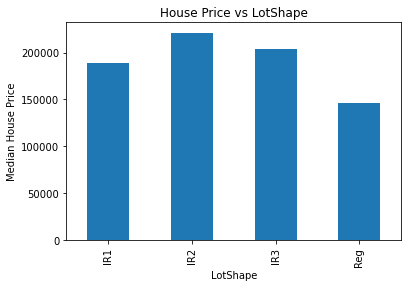

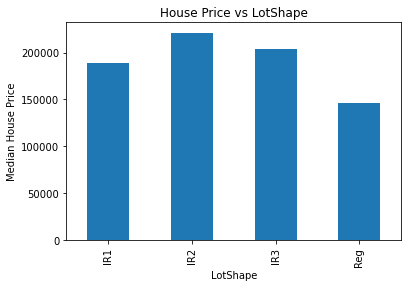

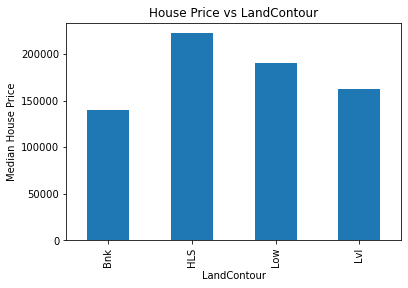

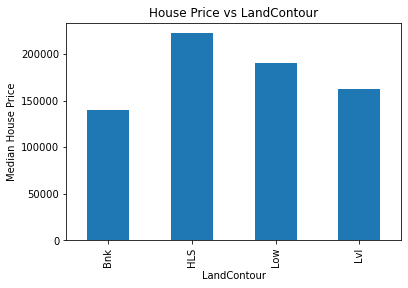

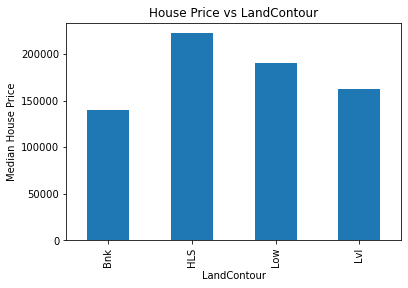

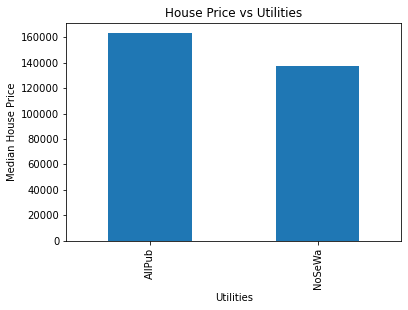

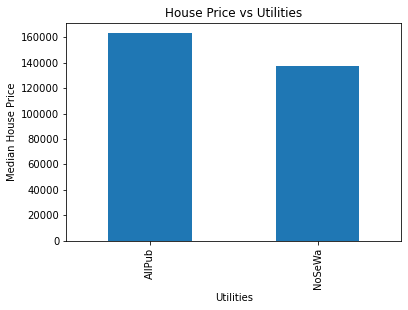

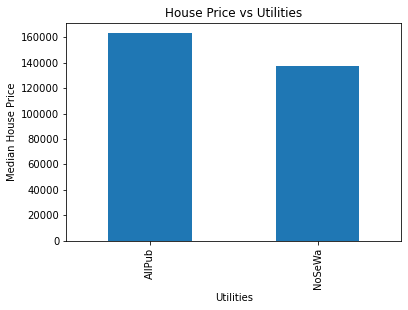

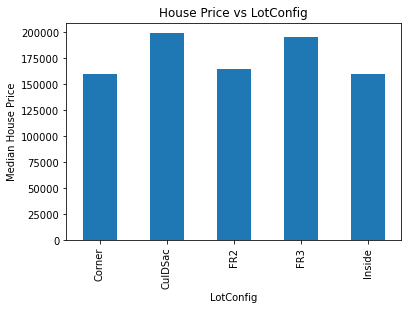

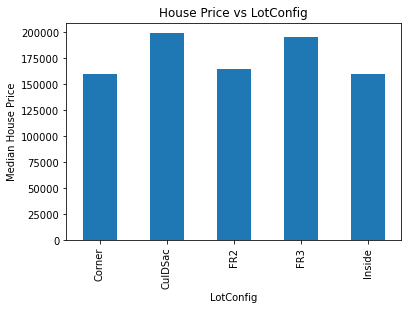

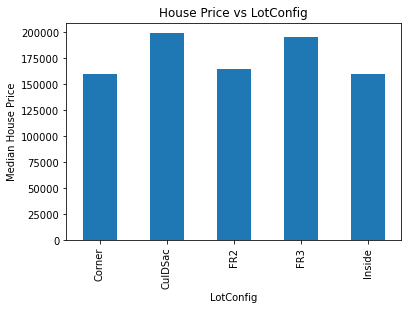

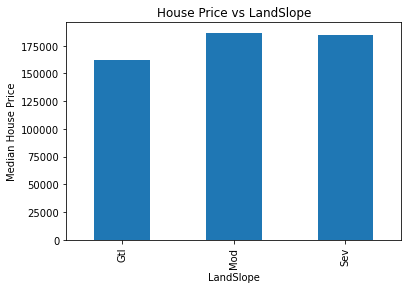

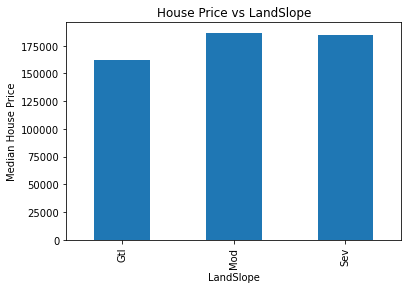

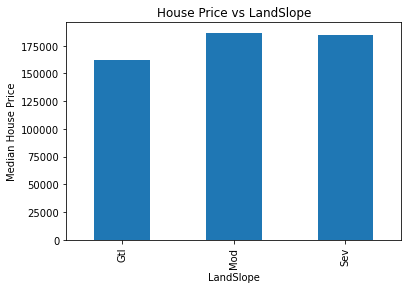

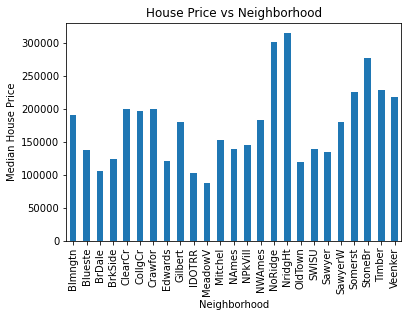

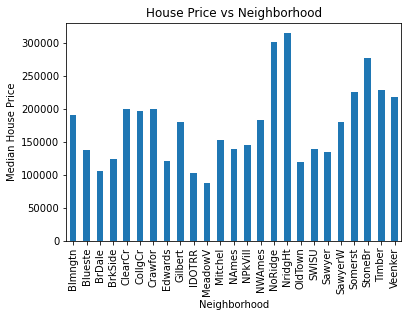

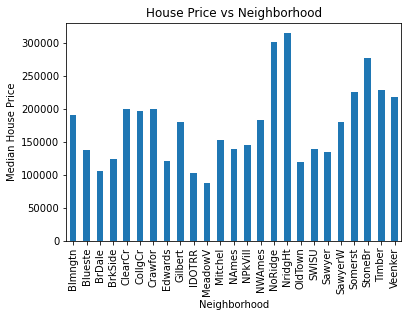

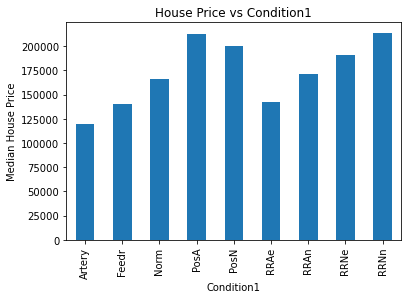

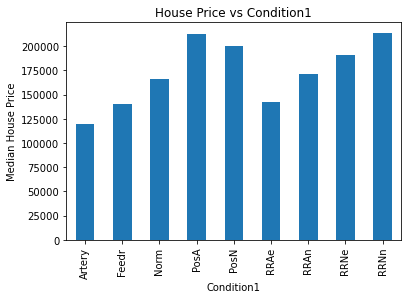

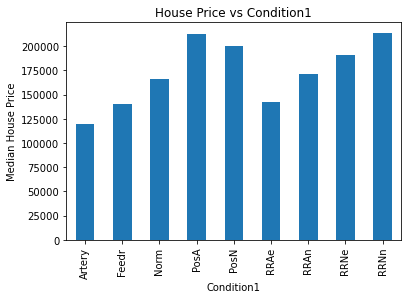

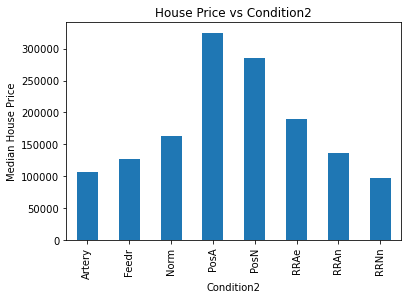

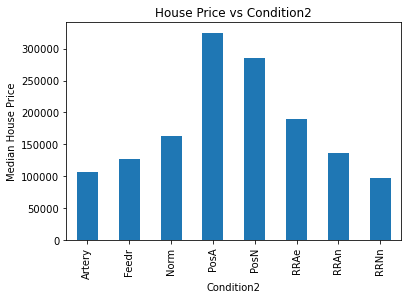

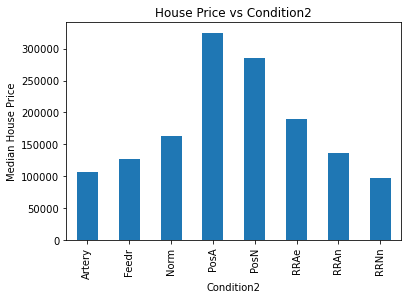

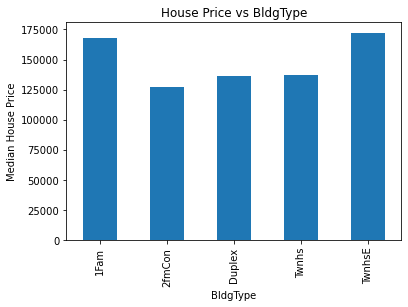

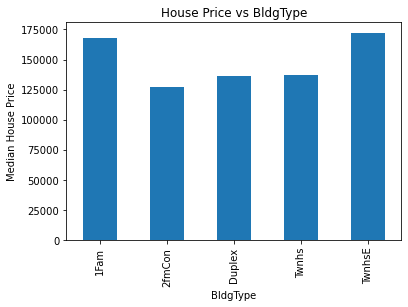

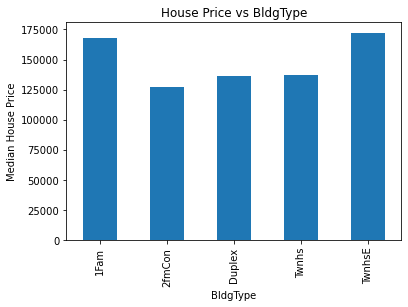

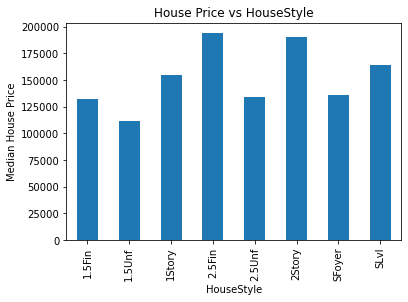

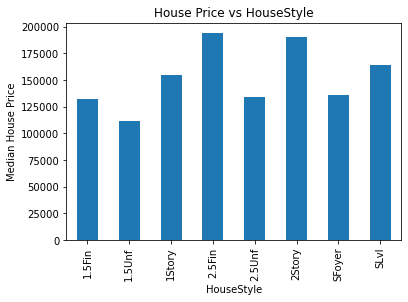

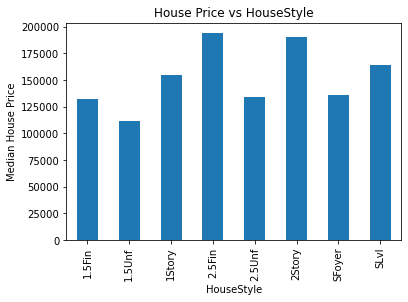

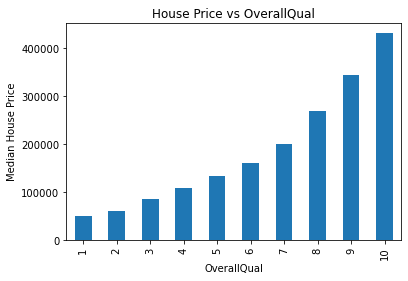

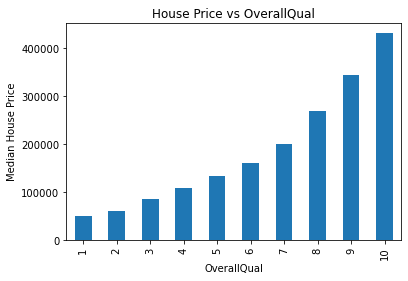

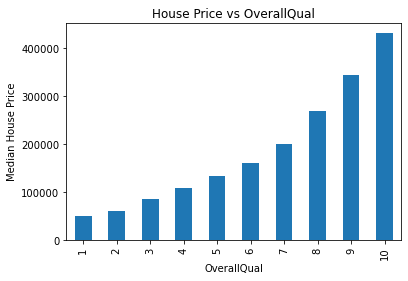

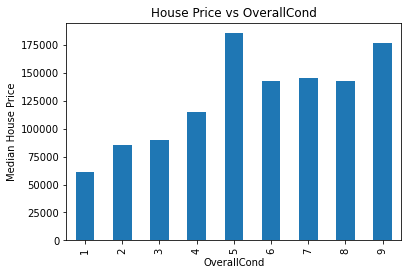

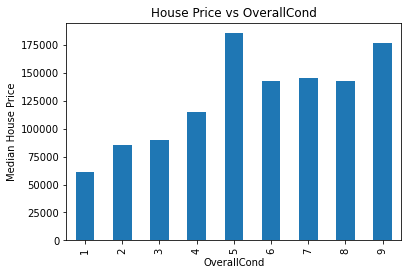

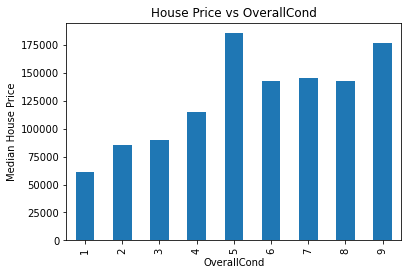

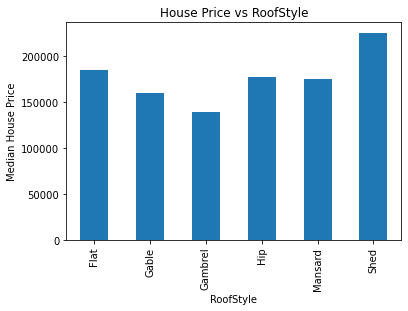

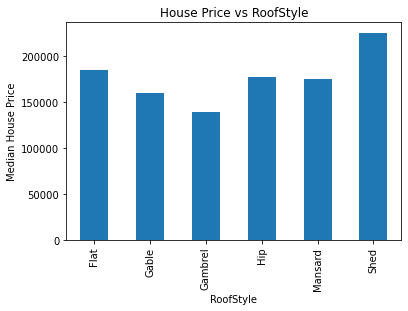

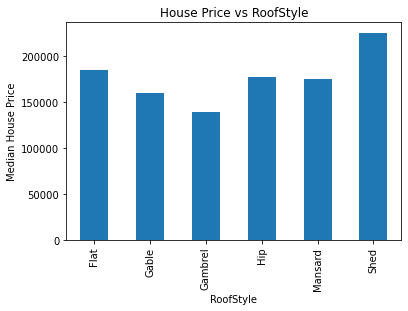

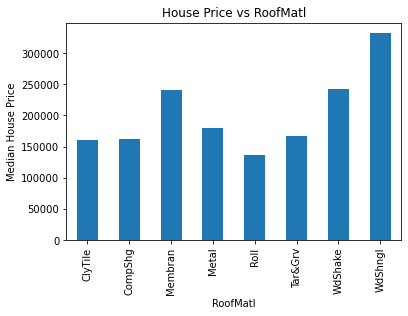

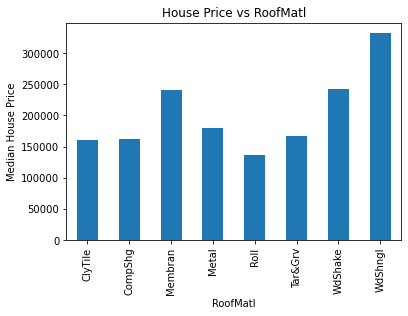

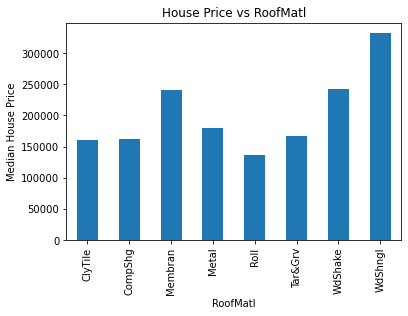

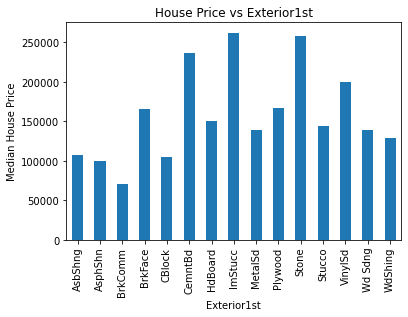

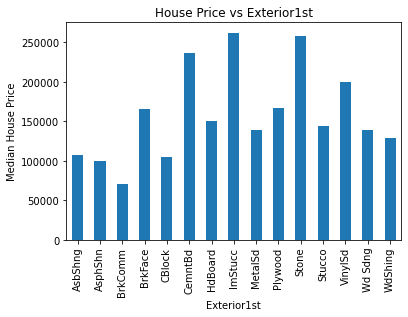

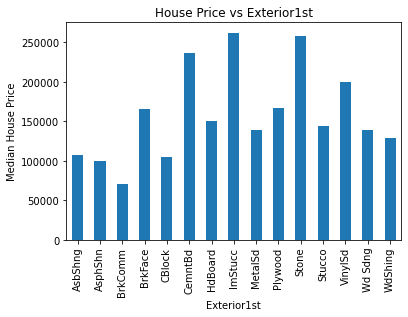

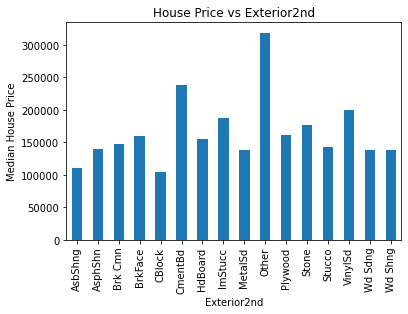

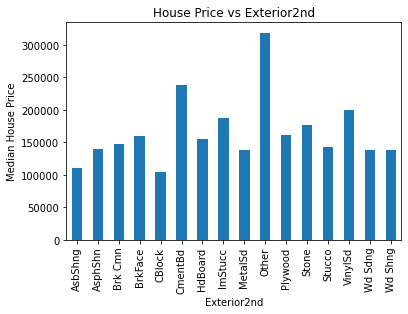

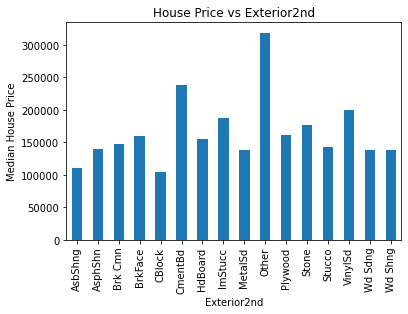

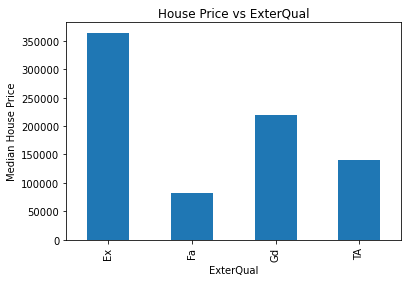

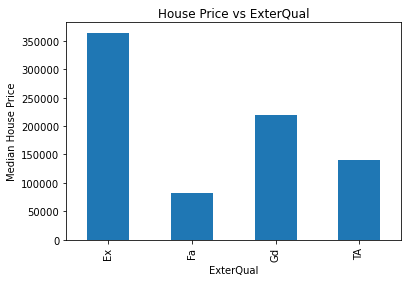

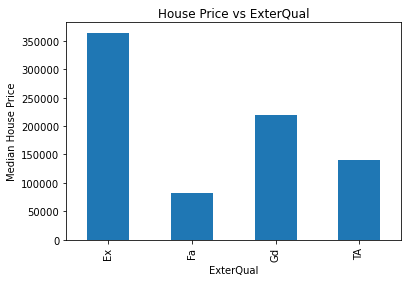

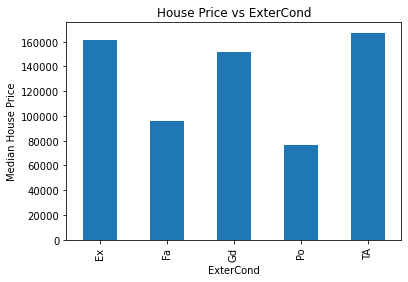

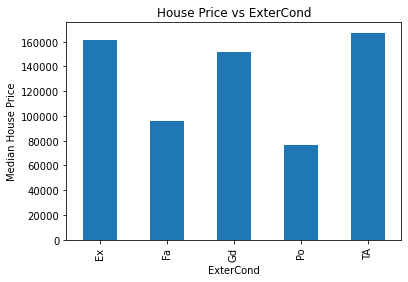

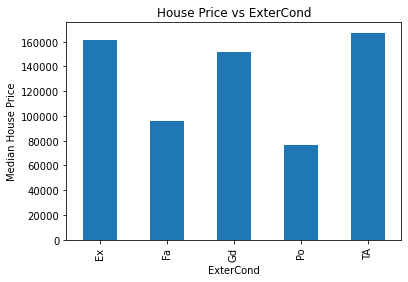

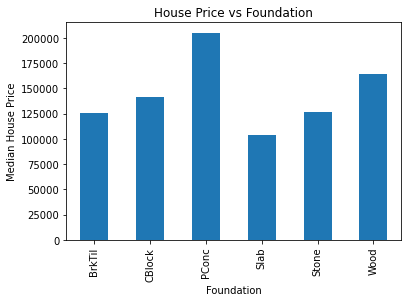

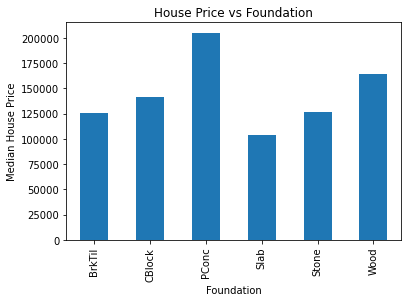

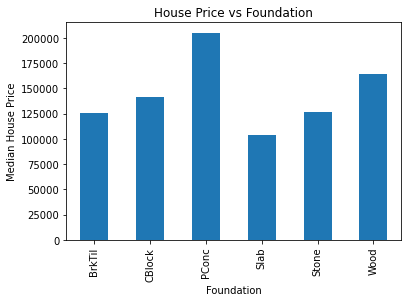

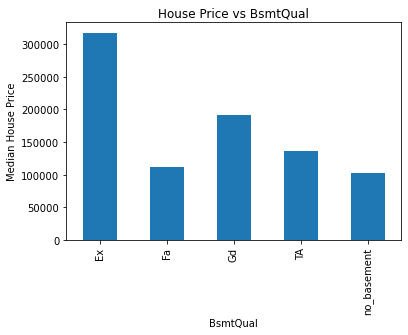

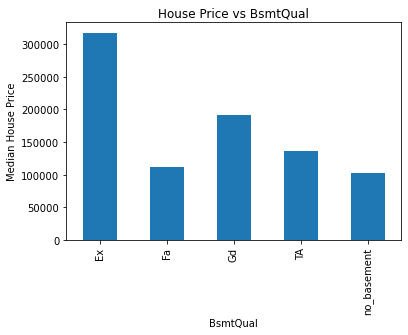

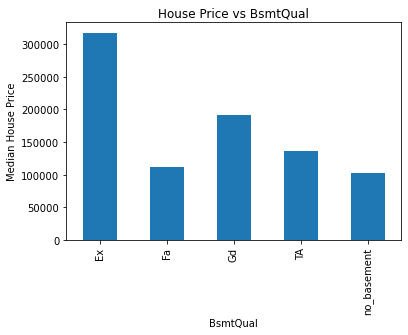

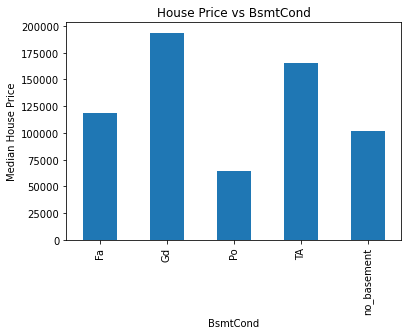

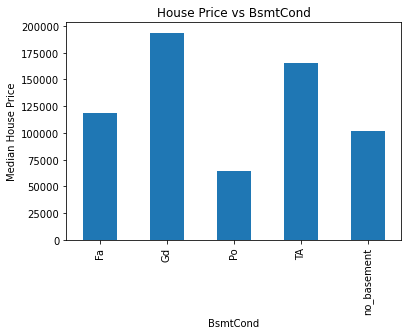

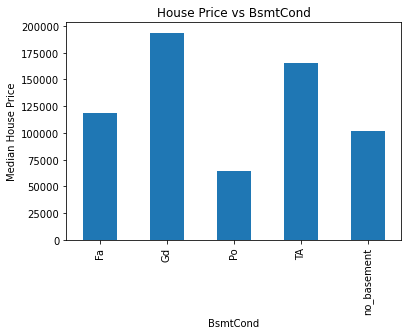

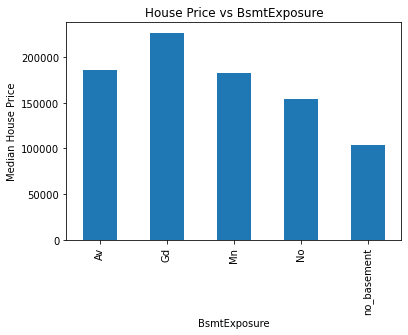

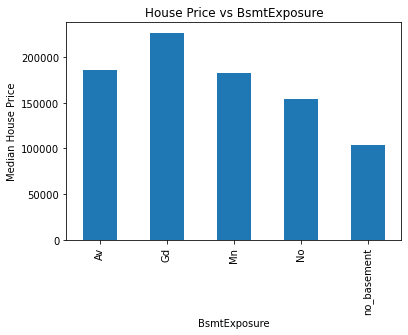

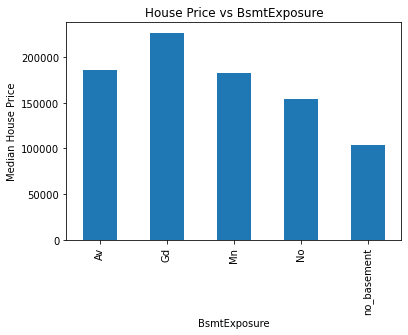

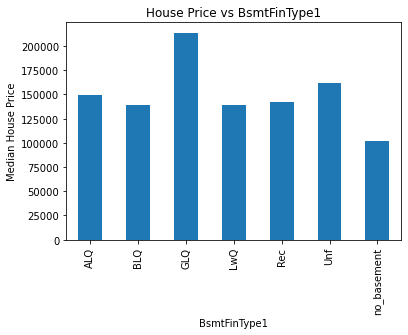

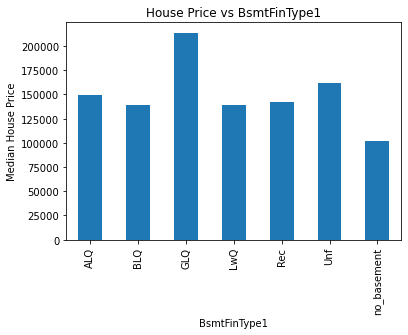

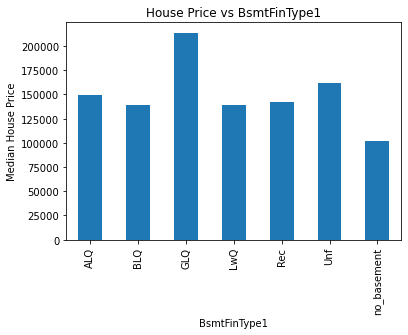

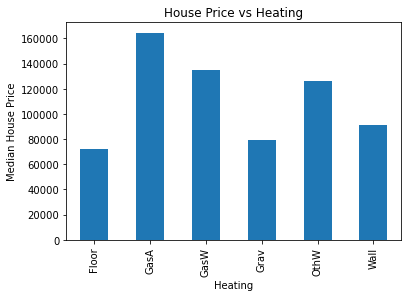

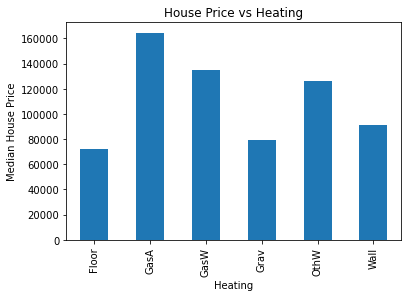

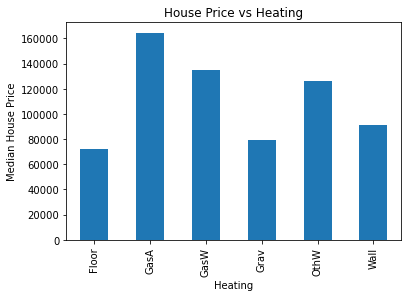

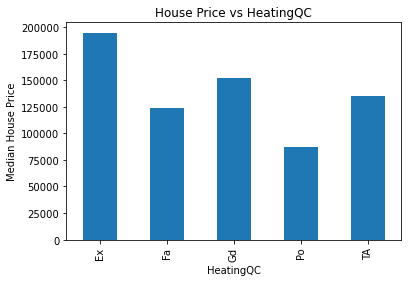

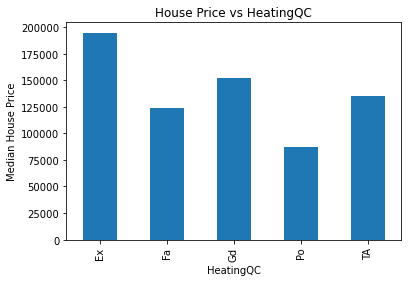

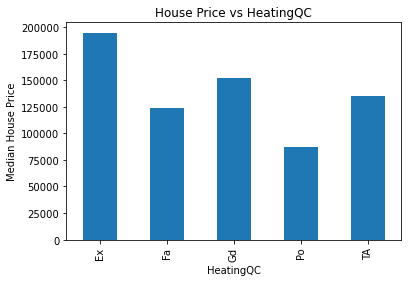

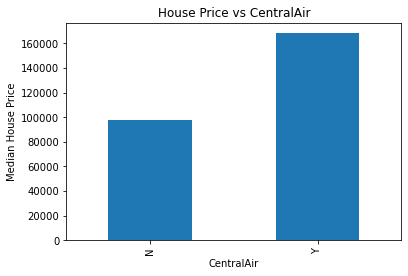

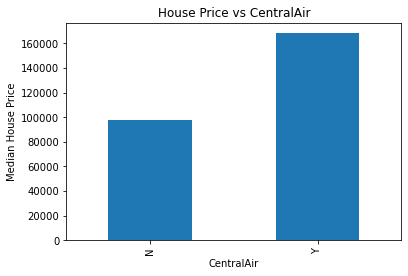

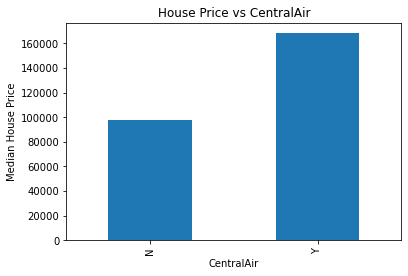

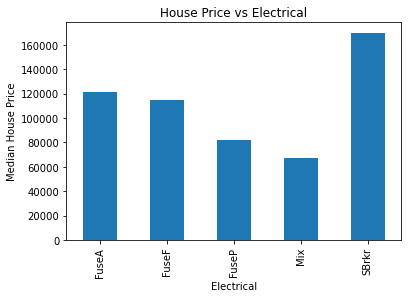

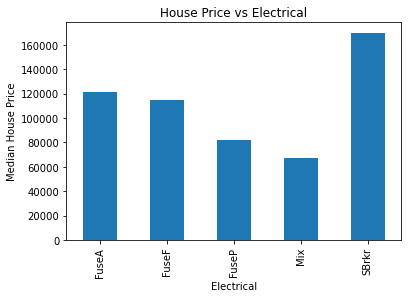

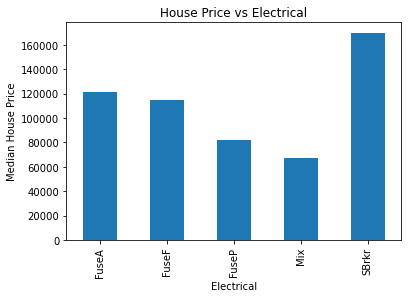

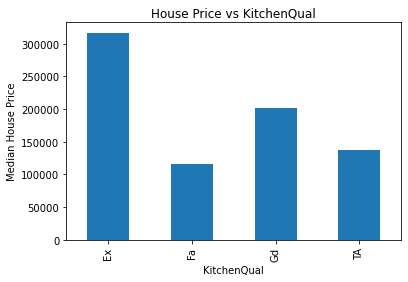

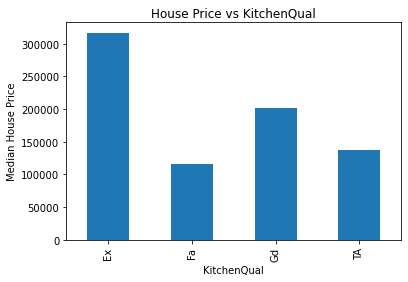

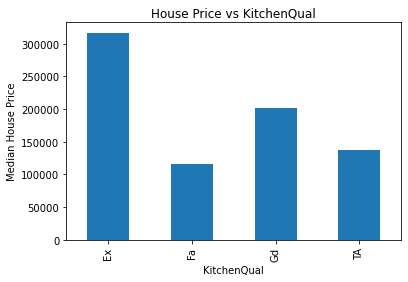

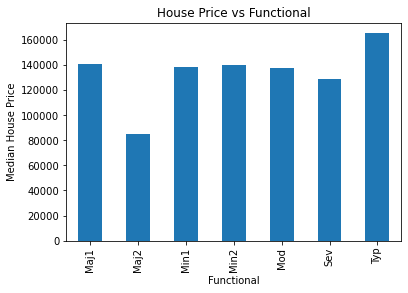

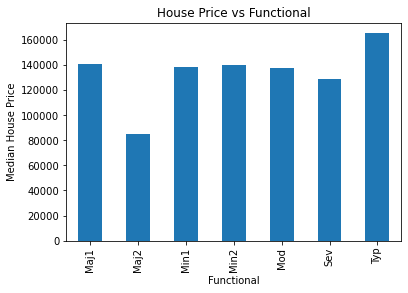

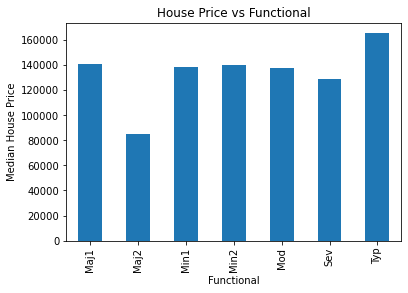

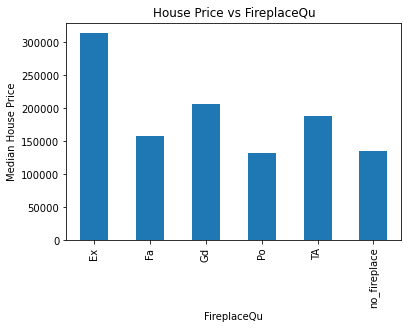

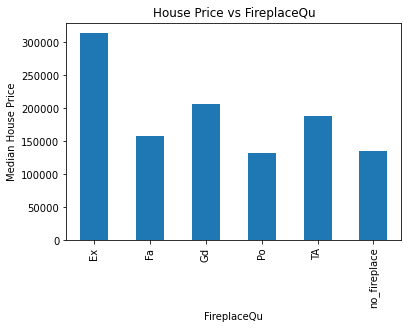

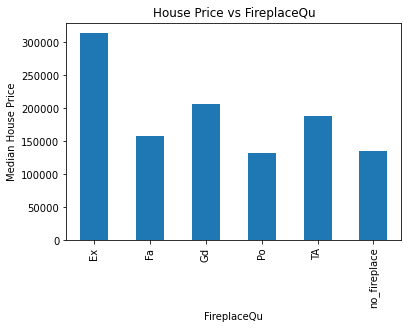

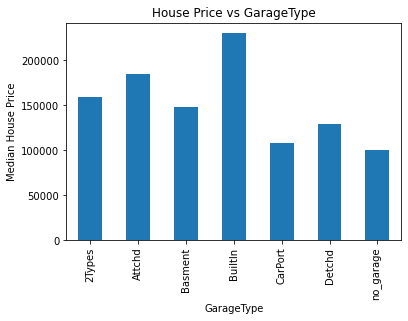

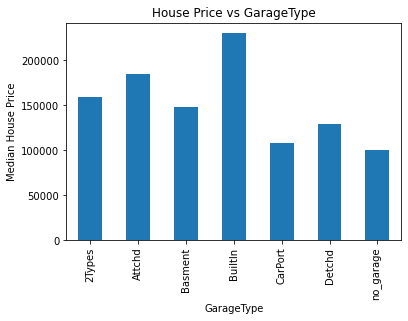

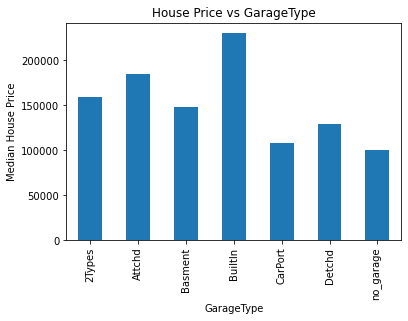

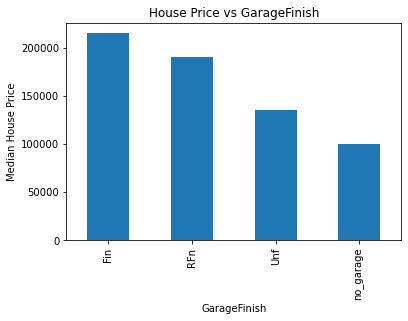

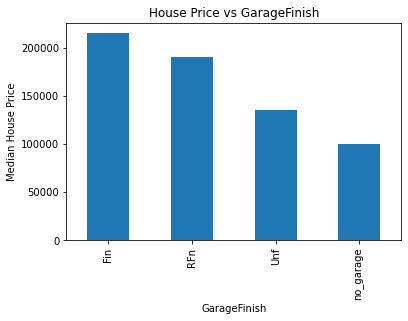

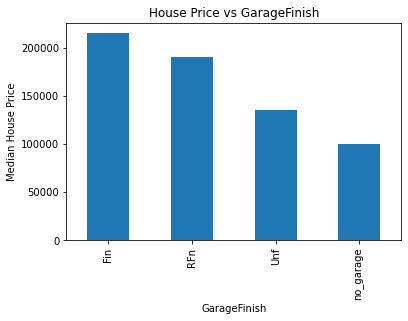

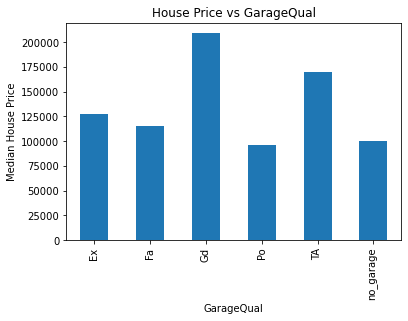

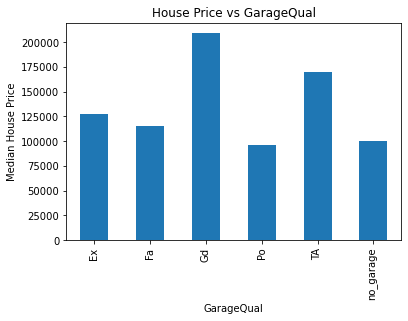

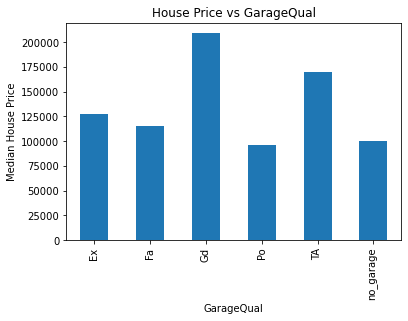

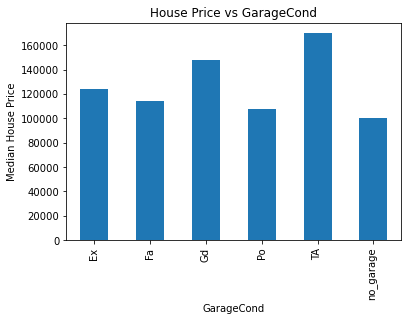

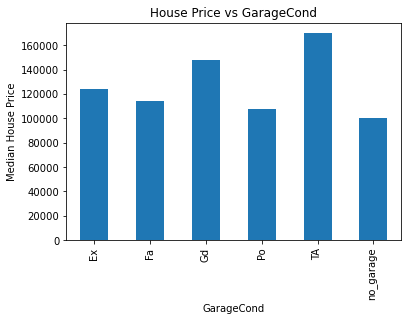

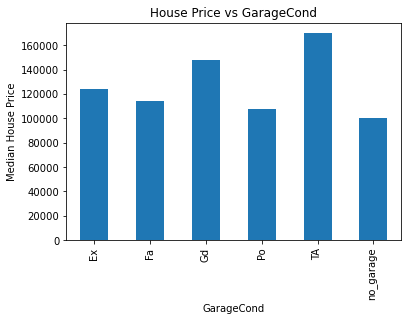

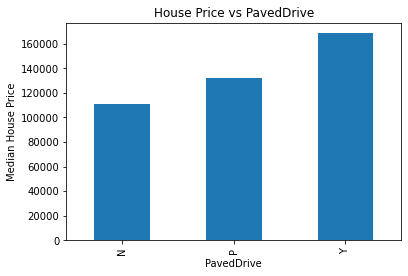

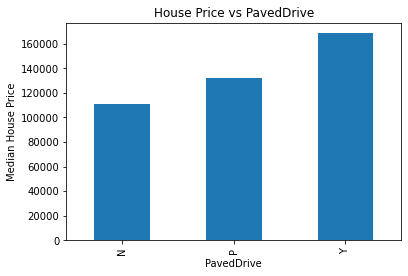

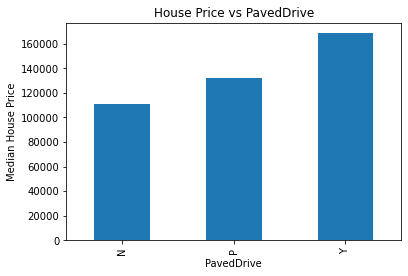

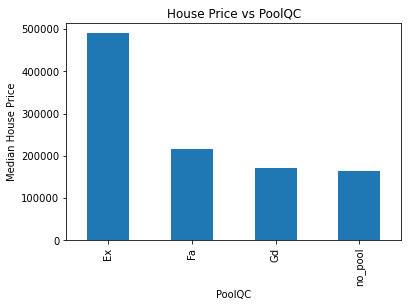

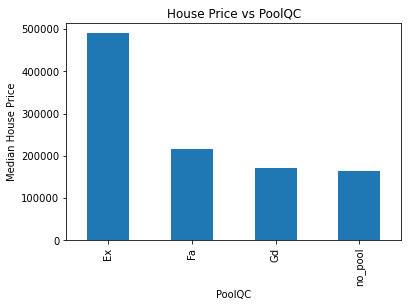

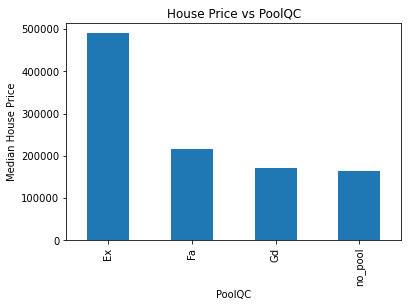

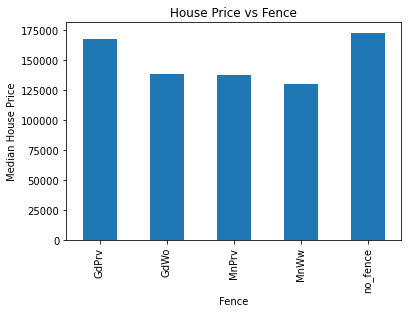

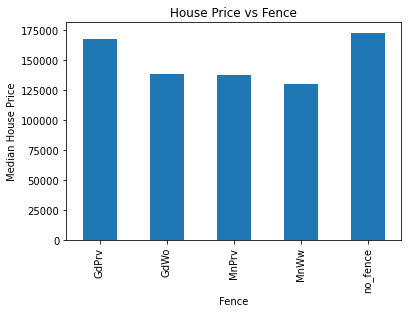

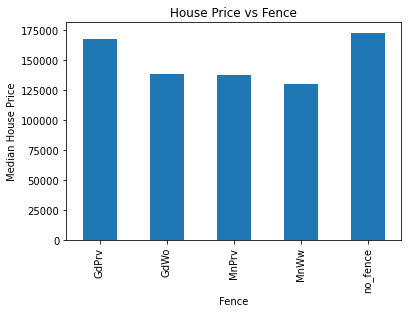

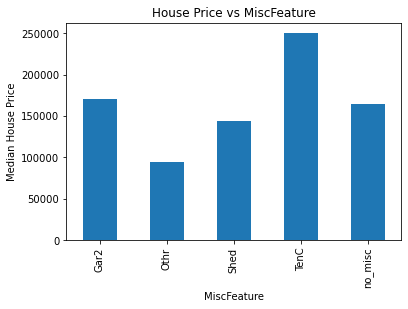

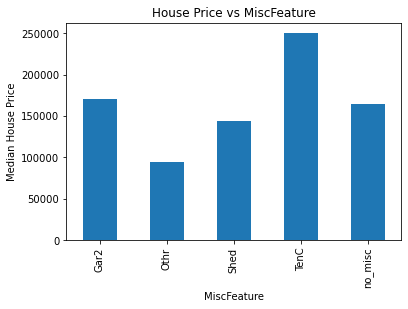

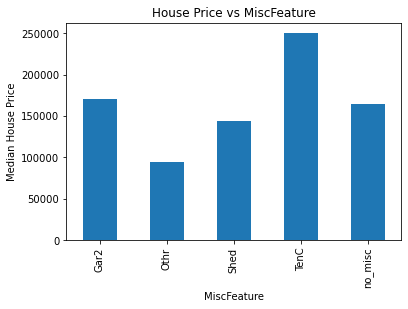

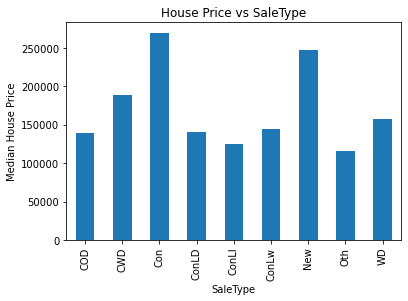

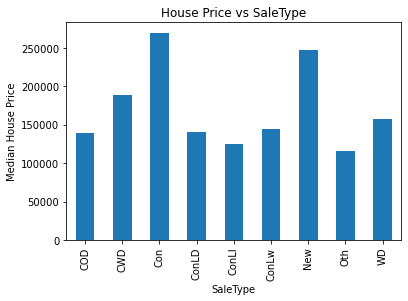

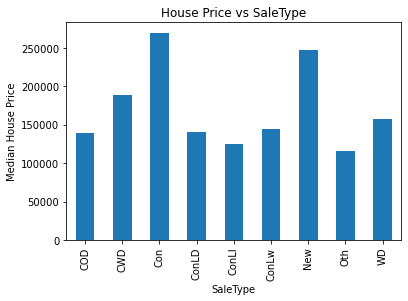

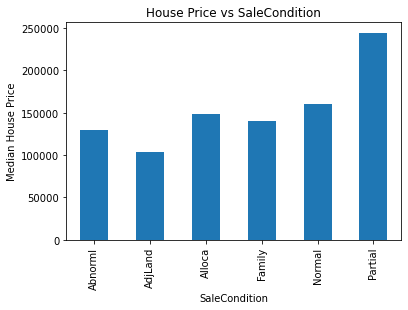

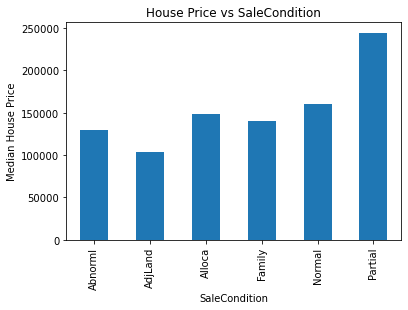

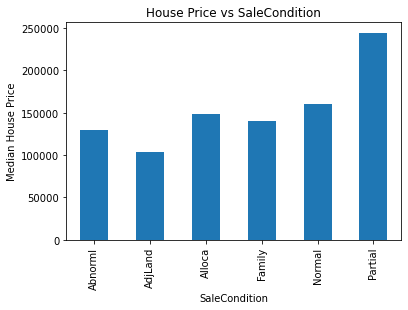

In [7]:
# let's check how the price is distributed among the groups

for i in cat_cols:
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Median House Price')
    plt.title(f"House Price vs {i}")
    plt.show()

In [8]:
# temporal columns analysis
for i in temp:
    print(i)
    print("------")
    print(data[i].value_counts())
    print('\n\n')

YearBuilt
------
2006    66
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64



YearRemodAdd
------
1950    178
2006     97
2007     75
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64



GarageYrBlt
------
2005.0    65
2006.0    60
2004.0    54
2003.0    50
2007.0    49
          ..
1872.0     1
1927.0     1
1906.0     1
1911.0     1
1933.0     1
Name: GarageYrBlt, Length: 102, dtype: int64



MoSold
------
6     253
7     234
5     203
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64



YrSold
------
2009    338
2007    329
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64



YearBuilt
------
2006    66
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1


In [3]:
import dtale, sweetviz, pandasgui, pandas_profiling

In [10]:
profile_report = pandas_profiling.ProfileReport(data, title='Housing Price Profile Report', explorative=True)

In [11]:
profile_report.to_file("../report/report.html")

PandasGUI INFO — numexpr.utils — NumExpr defaulting to 4 threads.


PandasGUI INFO — numexpr.utils — NumExpr defaulting to 4 threads.
PandasGUI INFO — numexpr.utils — NumExpr defaulting to 4 threads.


In [5]:
dt = dtale.show(data)

2021-01-23 21:38:34,549 - INFO     - NumExpr defaulting to 4 threads.


In [8]:
dtale.show(data)

http://satya:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)
Exception occurred while processing request: Function names must be unique if there is no new column names assigned
Traceback (most recent call last):
  File "C:\Users\satyapati\anaconda3\lib\site-packages\dtale\views.py", line 82, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\satyapati\anaconda3\lib\site-packages\dtale\views.py", line 2399, in get_column_analysis
    hist = data.groupby(category_col)[[selected_col]].agg(aggs)
  File "C:\Users\satyapati\anaconda3\lib\site-packages\pandas\core\groupby\generic.py", line 942, in aggregate
    relabeling, func, columns, order = reconstruct_func(func, **kwargs)
  File "C:\Users\satyapati\anaconda3\lib\site-packages\pandas\core\a

2021-01-23 21:46:11,145 - ERROR    - Exception occurred while processing request: Function names must be unique if there is no new column names assigned
Traceback (most recent call last):
  File "C:\Users\satyapati\anaconda3\lib\site-packages\dtale\views.py", line 82, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\satyapati\anaconda3\lib\site-packages\dtale\views.py", line 2399, in get_column_analysis
    hist = data.groupby(category_col)[[selected_col]].agg(aggs)
  File "C:\Users\satyapati\anaconda3\lib\site-packages\pandas\core\groupby\generic.py", line 942, in aggregate
    relabeling, func, columns, order = reconstruct_func(func, **kwargs)
  File "C:\Users\satyapati\anaconda3\lib\site-packages\pandas\core\aggregation.py", line 80, in reconstruct_func
    raise SpecificationError(
pandas.core.base.SpecificationError: Function names must be unique if there is no new column names assigned


In [9]:
advert_report = sweetviz.analyze(data)
advert_report.show_html('../report/Advertising.html')


Report ../report/Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
report = pandasgui.show(data)